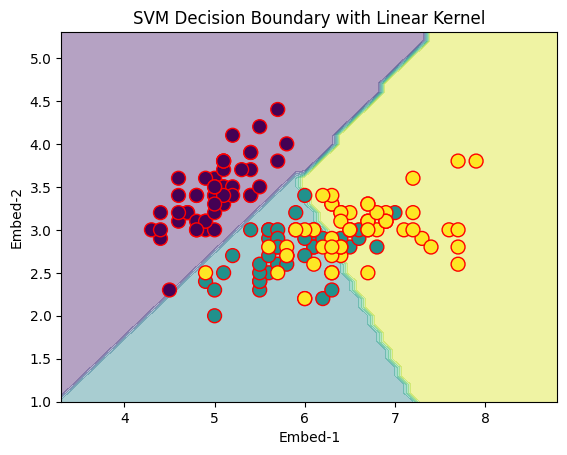

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load the iris dataset (or any other dataset you'd like)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization purposes
y = iris.target

# Create a linear SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X, y)

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='r')
plt.xlabel('Embed-1')
plt.ylabel('Embed-2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()


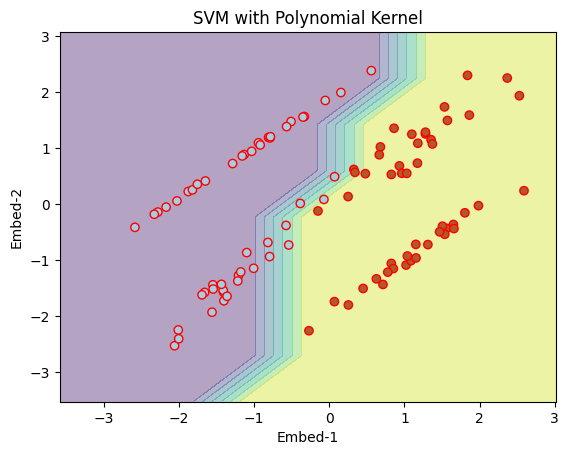

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate sample data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # Degree of the polynomial kernel
svm_poly.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .825  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='r', cmap=plt.cm.Paired)
    plt.xlabel('Embed-1')
    plt.ylabel('Embed-2')
    plt.title('SVM with Polynomial Kernel')
    plt.show()

plot_decision_boundary(svm_poly, X, y)


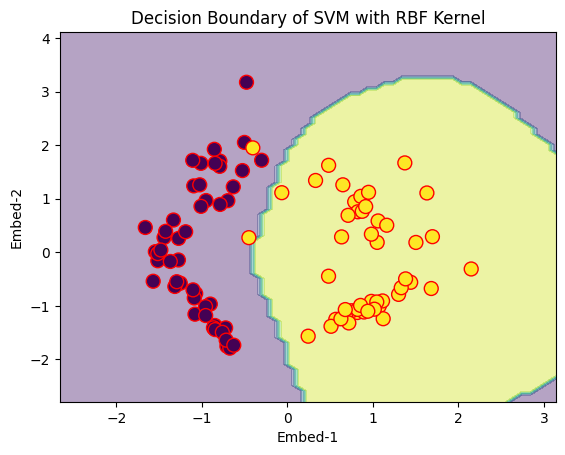

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate some random data
np.random.seed(0)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Train the SVM with RBF kernel
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(X, y, classifier):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='r')
    plt.xlabel('Embed-1')
    plt.ylabel('Embed-2')
    plt.title('Decision Boundary of SVM with RBF Kernel')
    plt.show()

plot_decision_boundary(X, y, svm)


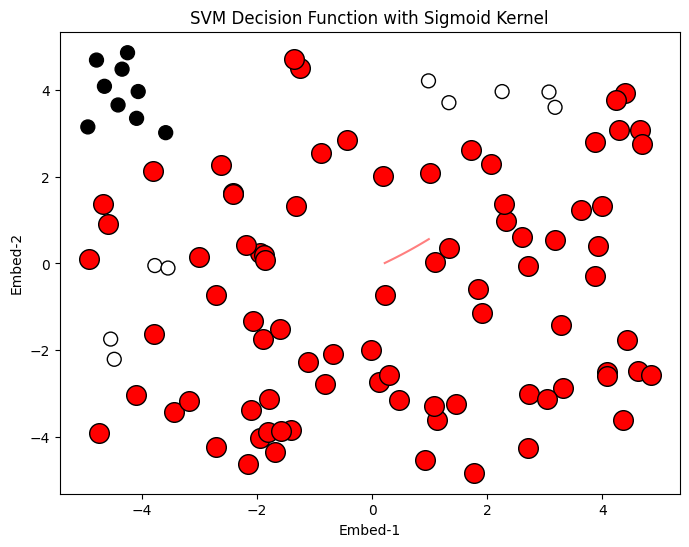

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generating random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 2) * 10 - 5  # Random data in range [-5, 5]
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # Creating a non-linearly separable problem

# Training SVM with Sigmoid kernel
svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(X, y)

# Plotting the decision function
def plot_decision_function(classifier, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, s=100, edgecolors='k')
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=200, facecolors='red', edgecolors='k')
    ax.set_xlabel('Embed-1')
    ax.set_ylabel('Embed-2')

# Plotting the decision function for the SVM with Sigmoid kernel
plt.figure(figsize=(8, 6))
plot_decision_function(svm_model)
plt.title('SVM Decision Function with Sigmoid Kernel')
plt.show()
